In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Conjugate Gradient Method for Optimization:
# The CG method is used to optimize a quadratic function efficiently, avoiding the high
# computational cost of Newton’s method and improving convergence compared to steepest descent.
# The method finds the local minimum of a function by generating a sequence of conjugate directions.
# 1. Initialize with an initial guess for the variable(s) to optimize.
# 2. Compute the initial gradient and the first search direction.
# 3. Perform a line search to determine the optimal step size.
# 4. Update the position and compute a new direction using a correlation factor.
# 5. Repeat until convergence based on the gradient norm.

class ConjugateGradient:
    def __init__(self, epsilon=1e-6, max_iterations=100):
        self.epsilon = epsilon
        self.max_iterations = max_iterations
        self.x_history = []
        self.cost_history = []

    def cost_function(self, x, A, b, c):
        # Quadratic function: f(x) = 0.5 * x^T * A * x + b^T * x + c
        return 0.5 * np.dot(x.T, np.dot(A, x)) + np.dot(b.T, x) + c

    def gradient(self, x, A, b):
        # Gradient of the quadratic function: ∇f(x) = A * x + b
        return np.dot(A, x) + b

    def fit(self, initial_x, A, b, c):
        x = initial_x
        grad = self.gradient(x, A, b)
        d = -grad
        k = 0

        while np.linalg.norm(grad) > self.epsilon and k < self.max_iterations:
            # Compute step size alpha_k using the exact line search formula
            alpha_k = -np.dot(d.T, grad) / np.dot(d.T, np.dot(A, d))
            x = x + alpha_k * d
            self.x_history.append(x)
            cost = self.cost_function(x, A, b, c)
            self.cost_history.append(cost)

            grad_new = self.gradient(x, A, b)
            beta_k = np.dot(grad_new.T, np.dot(A, d)) / np.dot(d.T, np.dot(A, d))  # calculate the correlation factor
            d = -grad_new + beta_k * d

            grad = grad_new
            k += 1

        return x

Optimized x: [0.09090909 0.63636364]


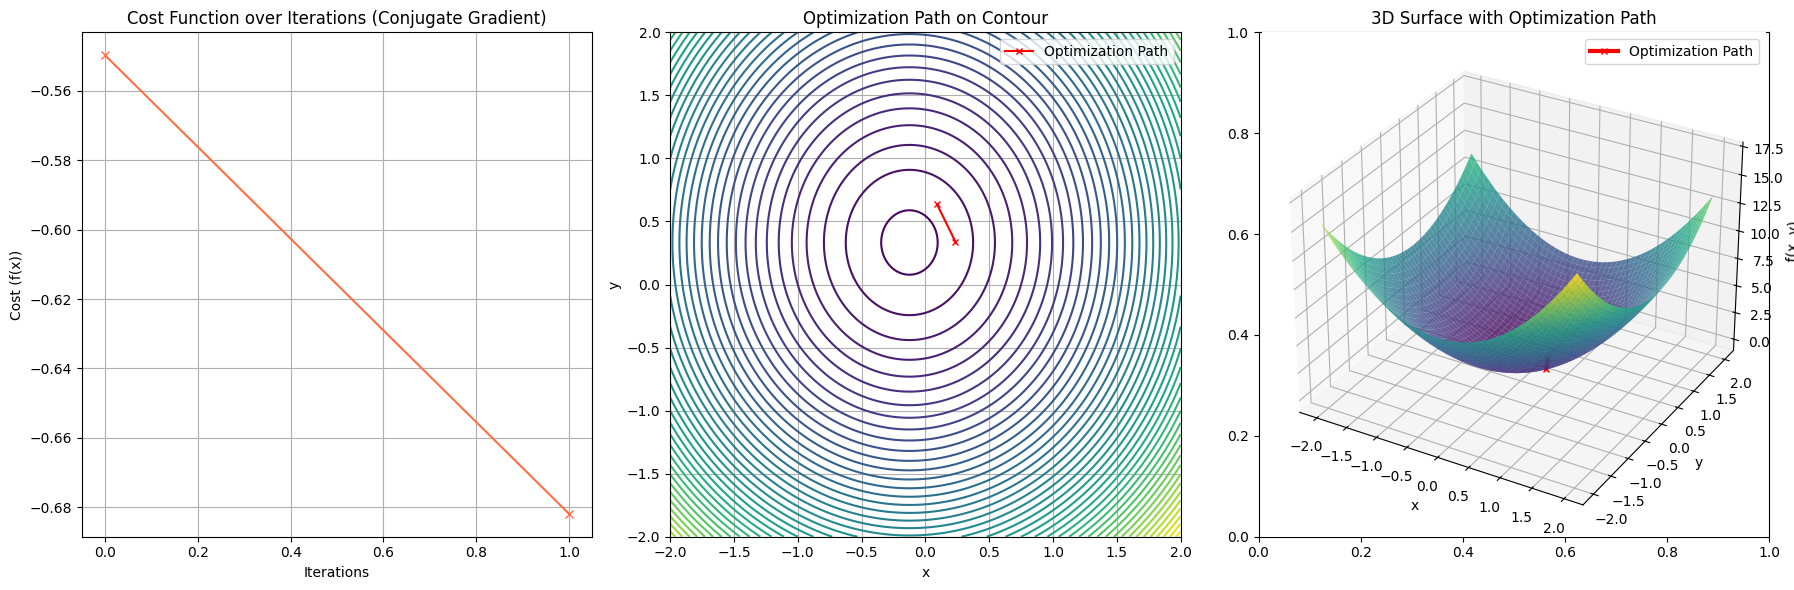

In [26]:
if __name__ == "__main__":
    A = np.array([[4, 1], [1, 3]])  # Symmetric positive definite matrix
    b = np.array([-1, -2])
    c = 0

    initial_x = np.array([2.0, 1.0])
    cg = ConjugateGradient(epsilon=1e-6, max_iterations=100)
    optimized_x = cg.fit(initial_x, A, b, c)

    print("Optimized x:", optimized_x)

    x_vals = np.linspace(-2, 2, 400)
    y_vals = np.linspace(-2, 2, 400)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = 0.5 * (X**2 * 4 + X * 1 + 3 * Y**2 - 2 * Y + 1)

    fig, ax = plt.subplots(1, 3, figsize=(18, 6))

    ax[0].plot(cg.cost_history, color='#FF7043', marker='x')
    ax[0].set_title('Cost Function over Iterations (Conjugate Gradient)')
    ax[0].set_xlabel('Iterations')
    ax[0].set_ylabel('Cost (f(x))')
    ax[0].grid(True)

    ax[1].contour(X, Y, Z, 50, cmap='viridis')
    ax[1].plot([x[0] for x in cg.x_history], [x[1] for x in cg.x_history], color='r', marker='x', markersize=5, linestyle='-', label="Optimization Path")
    ax[1].set_title('Optimization Path on Contour')
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('y')
    ax[1].legend()
    ax[1].grid(True)

    ax[2] = fig.add_subplot(133, projection='3d')
    ax[2].view_init(elev=30, azim=-60)
    ax[2].plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

    ax[2].plot([x[0] for x in cg.x_history], [x[1] for x in cg.x_history],
               [cg.cost_function(x, A, b, c) for x in cg.x_history], color='r', marker='x', markersize=5, label="Optimization Path", linestyle='-', linewidth=3)

    ax[2].set_title('3D Surface with Optimization Path')
    ax[2].set_xlabel('x')
    ax[2].set_ylabel('y')
    ax[2].set_zlabel('f(x, y)')
    ax[2].legend()

    plt.tight_layout()
    plt.show()